# Homework 1. MNIST 데이터셋을 활용해 다중 분류 수행하기
### 과목코드: 2150085101
### 팀명: 4조
### 팀장: 20202995 장진영
### 팀원: 20201571 강현준
### 팀원: 20201601 이시호


#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

### 1. (코드) MNIST 데이터셋 받기
   - (분석) 데이터셋에 대해 분석하기

In [3]:
# 필요 라이브러리 import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from collections import Counter

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

<h1>MNIST Dataset 분석 </h1>

70000개의 이미지 데이터가 있으며 target은 0부터 9까지의 값으로 구성되어 있다.<br>

이미지는 28 * 28 픽셀의 흑백 손글씨 숫자로 구성되어 있으며 각 이미지는 0부터 9까지의 숫자중 하나를 나타낸다.


###2. (코드) 데이터셋을 train / validation / test set 으로 분할하기
   - (분석) 데이터셋을 분할한 방식에 대해 설명하고, 해당 분할 방식을 수행한 이유에 대해 설명하기

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

<h1> 데이터셋 분할 방식 설명</h1>
훈련에 사용되는 데이터 양이 충분히 많아야 하기 때문에 70000개의 데이터 중 60000개의 데이터를 training set으로, 10000개의 데이터를 test set으로 분할하였다. <br>
또한, Training data 중에서 90:10 비율로(Training data : Validation data)로 분할하였는데. 이는 MNIST같은 대규모 데이터셋에서 일반적으로 사용하는 분할 비율을 사용한 것이다.

###3. (코드) 특성 스케일링을 이용한 데이터셋 전처리하기
   - (분석) 스케일링을 수행한 방식에 대해 설명하고, 해당 스케일링을 수행한 이유에 대해 설명하기

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test)


<h1> Min-Max Scaling 선택 이유 </h1>

MNIST의 픽셀 값은 0 ~ 255 범위 사이에서 표현된다. 따라서 이상치가 많지 않고 데이터 분포가 크게 편향되어 있지 않기 때문에 Min-MAx Scaling을 사용했다.


###4. (코드) 모델 선택하기
   - (분석) 머신러닝 모델의 후보군들에 대해 설명하고, 후보군들 중 특정 모델이 대표 모델로 선택된 이유에 대해 설명하기

<h1> 머신러닝 모델 후보군 </h1>

1. 로지스틱 회귀 (Logistic Regression) : 기본적으로 이중 클래스 분류에 사용되는 모델이지만 Softmax Regression을 사용하면 다중 클래스 분류에도 사용이 가능하다. 하지만 데이터의 선형 관계를 이용해 분석하는 로지스틱 회귀는 데이터가 비선형적인(4와 9의 유사성 등) MNIST에는 사용하기 부적합하다고 판단했다.

2. kNN, 최근접이웃 (k-Nearest Neighbors) : 새로운 데이터를 가장 가까운 k개의 이웃의 class를 참조하여 분류하는 kNN 알고리즘을 이용해 분류할 수 있다. 그러나 kNN은 새로운 데이터 포인트를 분류할 때 기존의 모든 데이터와의 거리를 계산해야 하므로 데이터셋이 클수록 계산 비용이 급격히 증가하는 단점이 있다. 또한 단순히 이웃의 class를 기반으로 분류를 결정하기 때문에, 분류 결과에 대한 직관적인 설명이 어렵다. Scikit learn 으로 구현한 사례가 존재한다.

3. CNN, 합성곱 신경망 (Convolutional Neural Networks) : 이미지의 특징을 추출하여 각 숫자 이미지의 고유 패턴을 학습할 수 있으며 비선형 활성화 함수를 통해 데이터의 비선형적인 특성과 복잡한 패턴을 학습할 수 있다. 이미지 데이터와 같은 비정형 데이터에 탁월한 성능을 보이는 신경망 구조이며 특히 이미지의 공간적 관계와 패턴을 효과적으로 학습할 수 있어 MNIST와 같은 이미지 분류 작업에 자주 사용된다.

그 외에도 확률적 경사 하강 모델(SGD), 랜덤포레스트 모델, 결정트리 모델을 후보군으로 삼고 비교해봤다.








<h1> CNN 모델을 선택한 이유 </h1>

로지스틱 회귀 분석은 데이터의 선형 관계를 이용해 분석하기 때문에 데이터가 비선형적인 MNIST에는 사용하기 부적합하다고 판단했다. 또한, kNN, 최근접 이웃 모델은 분류 결과에 대한 직관적인 설명이 어려울 뿐 아니라 데이터셋 크기가 큰 MNIST 특성상 계산 비용이 과도하게 드는 단점이 있다. 따라서, 이미지 분류 작업에 자주 사용되며 다른 모델들과 비교 했을 때 가장 높은 정확도를 보이는 CNN모델을 사용하였다.



In [7]:
###SGD, RandomForest, Decision tree 훈련 코드
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

### SGD training
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_split)

### RandomForest training
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train_split)

### Decision tree training
decision_clf = DecisionTreeClassifier(random_state=42)
decision_clf.fit(X_train_scaled, y_train_split)

### validation
sgd_val_score = sgd_clf.score(X_val_scaled, y_val_split)
forest_val_score = forest_clf.score(X_val_scaled, y_val_split)
decision_val_score = decision_clf.score(X_val_scaled, y_val_split)

print(f"[SGD] Validation Accuracy: {sgd_val_score:.4f}")
print(f"[RF]  Validation Accuracy: {forest_val_score:.4f}")
print(f"[DT]  Validation Accuracy: {decision_val_score:.4f}")

### Test
sgd_test_score = sgd_clf.score(X_test_scaled, y_test)
forest_test_score = forest_clf.score(X_test_scaled, y_test)
decision_test_score = decision_clf.score(X_test_scaled, y_test)

print(f"[SGD] Test Accuracy: {sgd_test_score:.4f}")
print(f"[RF]  Test Accuracy: {forest_test_score:.4f}")
print(f"[DT]  Test Accuracy: {decision_test_score:.4f}")
"""

[SGD] Validation Accuracy: 0.9148
[RF]  Validation Accuracy: 0.9720
[DT]  Validation Accuracy: 0.8715
[SGD] Test Accuracy: 0.9122
[RF]  Test Accuracy: 0.9689
[DT]  Test Accuracy: 0.8734


In [8]:
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_val_scaled = X_val_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [9]:
### CNN 모델
def cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
cnn_model = cnn_model()
print("Training CNN Model")
cnn_model.fit(X_train_scaled, y_train_split, validation_data=(X_val_scaled, y_val_split), epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN Model
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9017 - loss: 0.3126 - val_accuracy: 0.9830 - val_loss: 0.0585
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0459 - val_accuracy: 0.9870 - val_loss: 0.0401
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9875 - val_loss: 0.0355
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9939 - loss: 0.0203 - val_accuracy: 0.9905 - val_loss: 0.0367
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9955 - loss: 0.0146 - val_accuracy: 0.9840 - val_loss: 0.0612
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9956 - loss: 0.0128 - val_accuracy: 0.9905 - val_loss: 0.0320
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9976 - loss: 0.0070 - val_accuracy: 0.9918 - val_loss: 0.0391
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.99

###5. (코드) 성능 평가하기
   - (분석) 최종적으로 학습된 모델을 이용해 test set 에 대한 성능을 정리하고, 이를 분석하기

In [11]:
loss, accuracy = cnn_model.evaluate(X_test_scaled, y_test)
print(f"Loss : {loss:.4f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0420
Loss : 0.0315
Accuracy: 99.17%


In [12]:
y_pred = cnn_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"\nPrecision: {precision :.6f}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1:.6f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Precision: 0.991728
Recall: 0.9917
F1 Score: 0.991701


<h1>Test set에 대한 성능 정리, 분석</h1>
Classification Report에 따르면, 각 클래스별로 F1 Score 모두 0.99 이상이며, 9와 7을 제외한 나머지 클래스에서는 Recall과 Precision 또한 0.99 이상의 값을 가진다. 또한, Test dataset을 활용한 테스트 과정에서 99.17%의 높은 정확도와 loss function 값이 0.0315로 매우 낮게 나타났다. 따라서, MNIST 다중 분류를 위해 제작한 CNN모델은 매우 우수한 성능을 보임을 알 수 있다.

###6. (코드) 에러 분석하기
   - (분석) 최종적으로 학습된 모델의 에러를 분석하기
   - (분석) `5. 성능 평가하기` 의 분석과 연관지어 에러를 분석하고 해결책을 제안하기


잘못 예측된 데이터 개수: 83 

잘못 예측된 클래스 상위 5개 

실제 클래스: 9, 잘못 예측된 클래스: 7, 횟수: 8
실제 클래스: 2, 잘못 예측된 클래스: 7, 횟수: 7
실제 클래스: 5, 잘못 예측된 클래스: 3, 횟수: 6
실제 클래스: 6, 잘못 예측된 클래스: 0, 횟수: 5
실제 클래스: 9, 잘못 예측된 클래스: 4, 횟수: 5


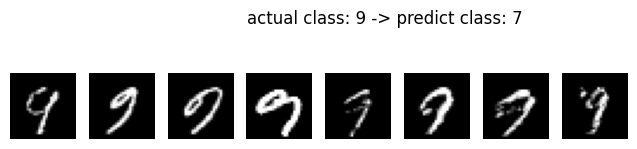

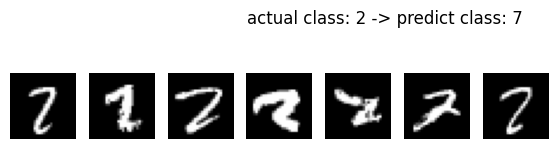

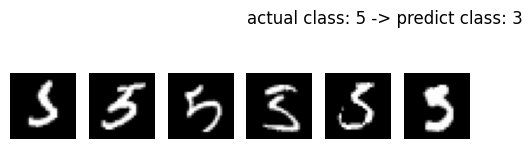

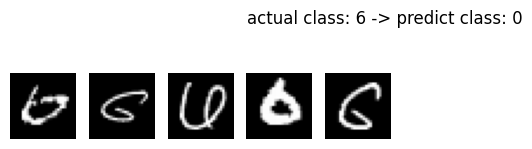

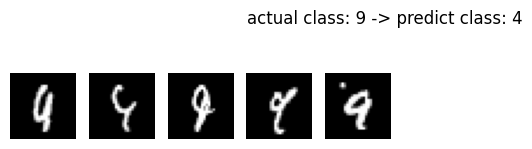

In [13]:
cm = confusion_matrix(y_test, y_pred_classes)

errors = {}
for i in range(10):
    for j in range(10):
        if i != j:
            errors[(i, j)] = cm[i, j]

top_5_errors = Counter(errors).most_common(5)
total_incorrect = np.where(y_pred_classes != y_test)[0]

print(f"\n잘못 예측된 데이터 개수: {len(total_incorrect)} \n")
print("잘못 예측된 클래스 상위 5개 \n")

for (actual, predicted), count in top_5_errors:
    print(f"실제 클래스: {actual}, 잘못 예측된 클래스: {predicted}, 횟수: {count}")

for i, ((actual, predicted), count) in enumerate(top_5_errors):
    incorrect_indices = np.where((y_test == actual) & (y_pred_classes == predicted))[0]

    if len(incorrect_indices) > 0:
        plt.figure(figsize=(10, 2))
        plt.suptitle(f"actual class: {actual} -> predict class: {predicted}")
        for j, idx in enumerate(incorrect_indices[:10]):
            plt.subplot(1, 10, j + 1)
            plt.imshow(X_test_scaled[idx].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()




<h1>모델 에러 분석</h1>
성능 평가에 따르면 5와 9 클래스에서 혼동 되는 패턴이 존재함을 알 수 있다. 잘못 예측된 클래스 상위 5개를 분석한 결과 클래스 9에서 잘못 예측되는 경향이 다수 관찰 되었으며 5를 3으로 혼동하거나 2를 7로, 6을 0으로 혼동하기도 한다.

<h1>해결책</h1>
잘못 예측된 이미지를 보면 특정 클래스가 다른 클래스와 모양적으로 매우 유사한 경우가 많은데 이를 해결하기 위해 데이터 증강을 통한 다양한 형태의 데이터를 추가하여 모델이 더 다양한 패턴을 학습할 수 있도록 한다.

###참고자료

https://www.v7labs.com/blog/train-validation-test-set

https://teddylee777.github.io/scikit-learn/scikit-learn-knn/

https://paperswithcode.com/sota/image-classification-on-mnist